# Netflix Data Cleaning, Analysis & Visualization

# Step 1: Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

# Step 2: Load Data

In [15]:
data = pd.read_csv("netflix_titles.csv")
print("Initial Dataset Shape:", data.shape)
data.head()

Initial Dataset Shape: (8790, 10)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Step 3: Data Cleaning

In [16]:
data.drop_duplicates(inplace=True)
data.dropna(subset=['director', 'country'], inplace=True)
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract date parts

In [17]:
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day

# Step 4: EDA

# 1. Movies vs TV Shows

C:\Users\veena\AppData\Local\Temp\ipykernel_4524\1823376464.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='Set2')


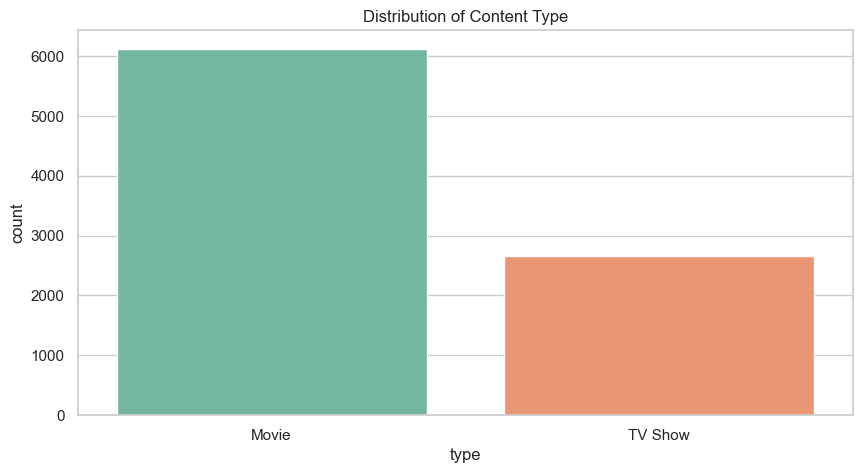

In [18]:
sns.countplot(x='type', data=data, palette='Set2')
plt.title("Distribution of Content Type")
plt.show()

# 2. Most Common Genres

C:\Users\veena\AppData\Local\Temp\ipykernel_4524\2304030325.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


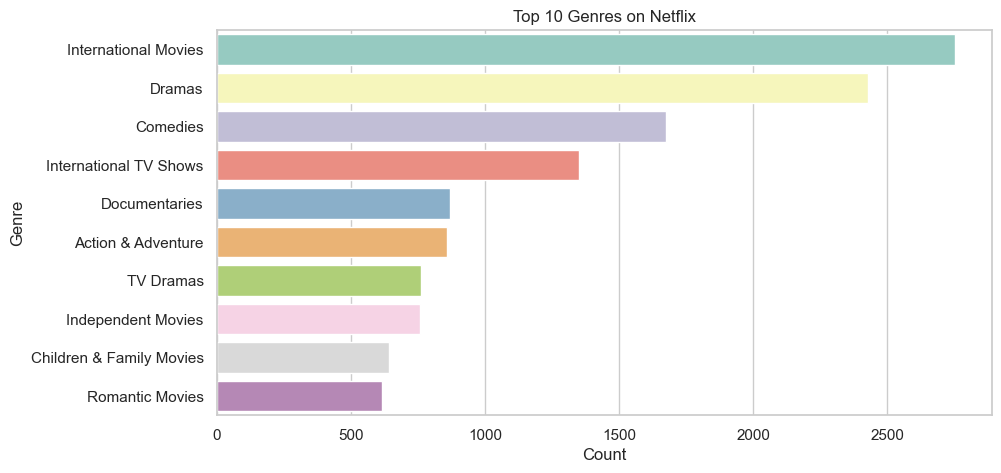

In [20]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# 3. Content Added Over the Years

C:\Users\veena\AppData\Local\Temp\ipykernel_4524\3210608693.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=data, palette='coolwarm')


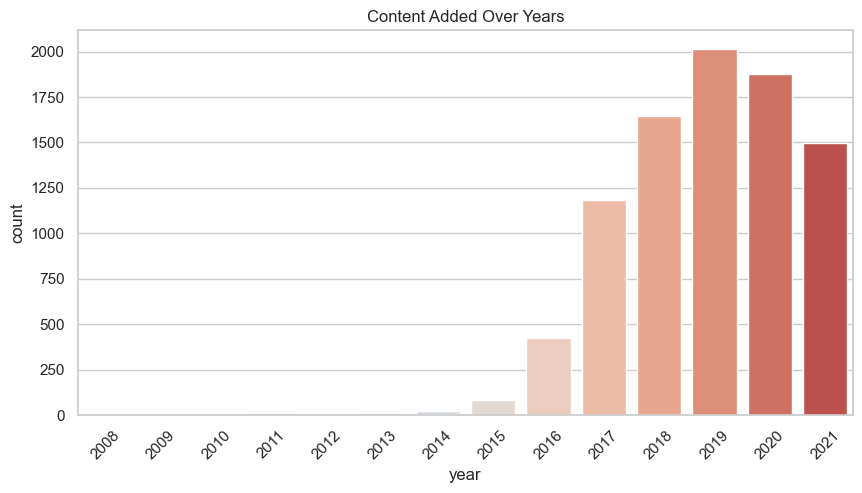

In [21]:
sns.countplot(x='year', data=data, palette='coolwarm')
plt.title("Content Added Over Years")
plt.xticks(rotation=45)
plt.show()

# 4. Top 10 Directors

C:\Users\veena\AppData\Local\Temp\ipykernel_4524\3908787735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


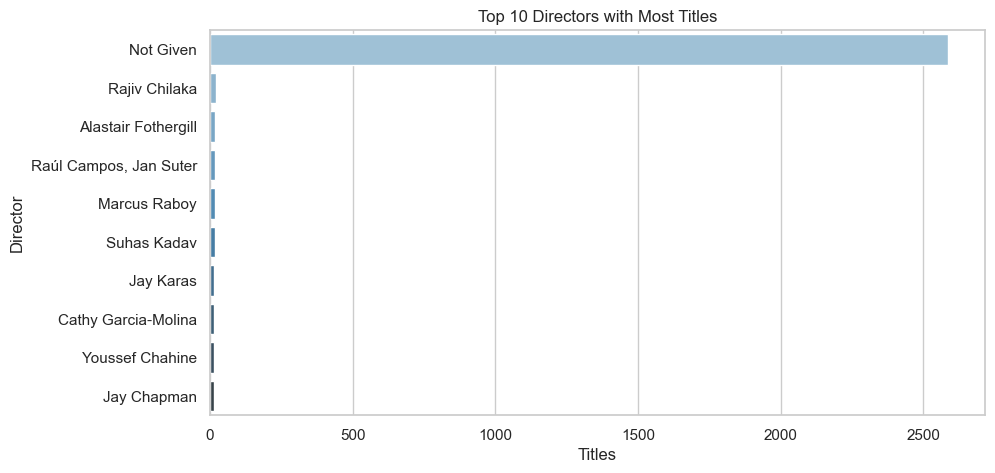

In [22]:
top_directors = data['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Titles")
plt.ylabel("Director")
plt.show()

# 5. Ratings Distribution

C:\Users\veena\AppData\Local\Temp\ipykernel_4524\1561821654.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=data, order=data['rating'].value_counts().index, palette='Set1')


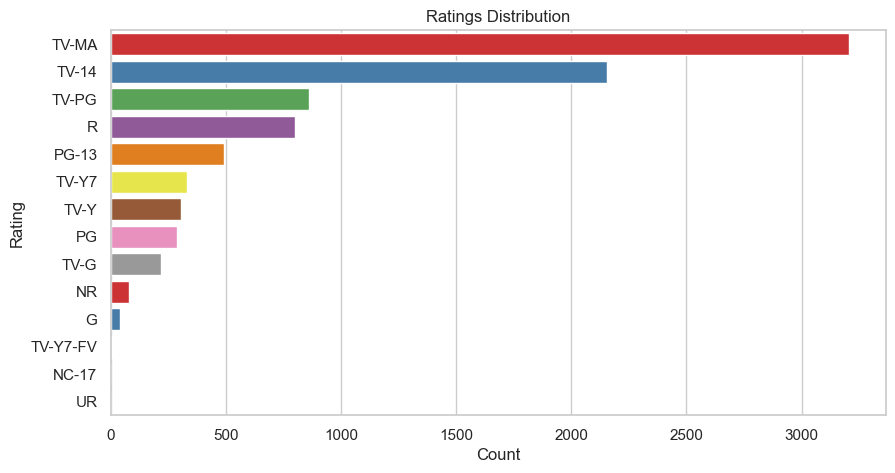

In [23]:
sns.countplot(y='rating', data=data, order=data['rating'].value_counts().index, palette='Set1')
plt.title("Ratings Distribution")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

# 6. WordCloud of Movie Titles

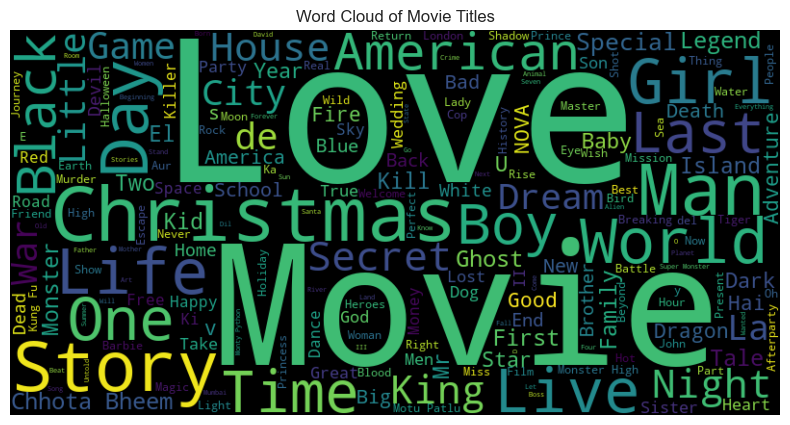

In [24]:
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Titles")
plt.show()

# 7. Monthly & Yearly Releases

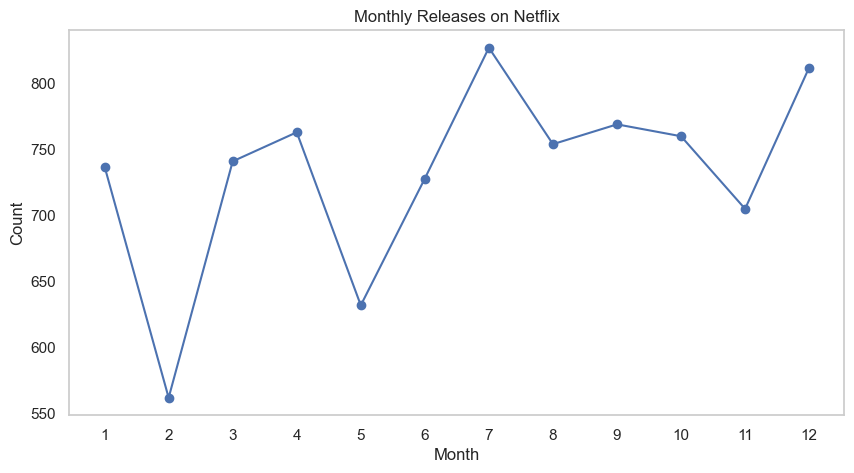

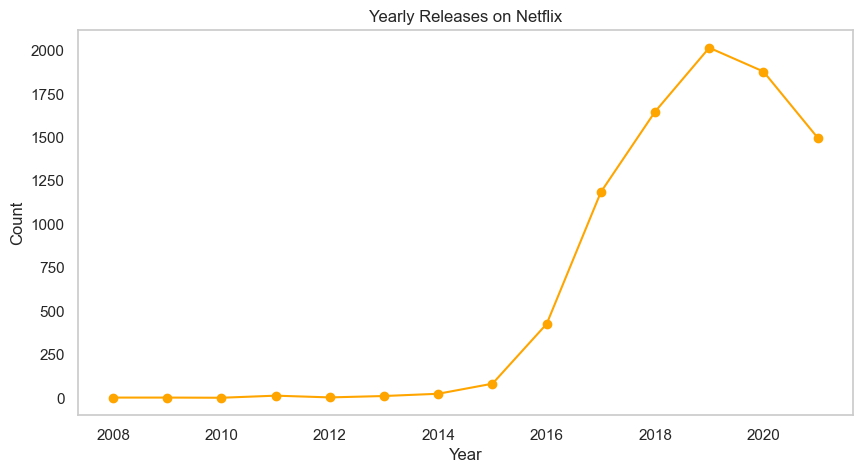

In [27]:
monthly = data['month'].value_counts().sort_index()
yearly = data['year'].value_counts().sort_index()
# Monthly
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Monthly Releases on Netflix")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(range(1,13))
plt.grid()
plt.show()

# Yearly
plt.plot(yearly.index, yearly.values, marker='o', color='orange')
plt.title("Yearly Releases on Netflix")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid()
plt.show()

# 8. Top 10 Countries

C:\Users\veena\AppData\Local\Temp\ipykernel_4524\607725499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


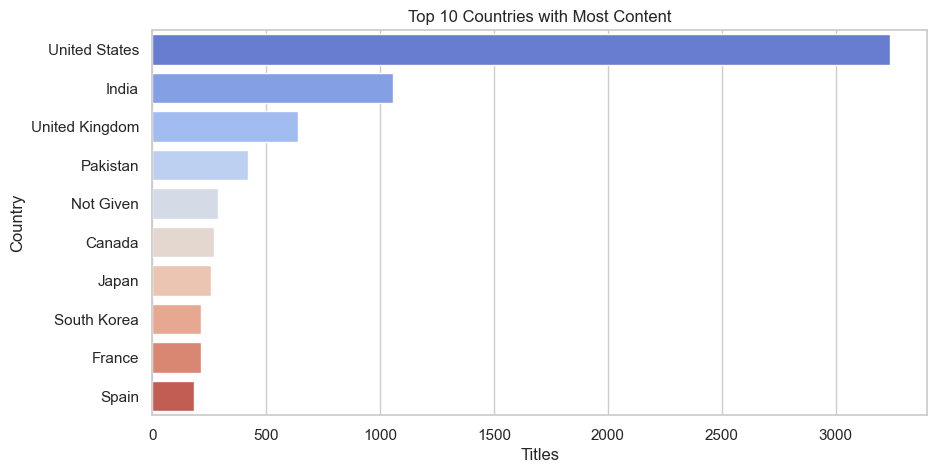

In [28]:
top_countries = data['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Titles")
plt.ylabel("Country")
plt.show()

# Save Cleaned Data

In [29]:
data.to_csv("netflix_cleaned.csv", index=False)